In [ ]:
!pip install textstat

In [ ]:
import nltk
nltk.download('punkt')
import re
import textstat as ts
from nltk.tokenize import sent_tokenize
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset_dscs.csv')

In [ ]:
df.head()

,sentence1,sentence2
0,The study of computation and information.,"The study of manipulating, managing, transform..."
1,The study of computation and information.,A branch of science that deals with the theory...
2,A plan of how to do something,A branch of science that deals with the theory...
3,"A finite sequence of well-defined, computer-im...",A specific set of instructions or steps on how...
4,"A finite sequence of well-defined, computer-im...",A procedure for solving a mathematical problem...


In [ ]:
column1_list = df['sentence1'].tolist()
column2_list = df['sentence2'].tolist()
dataset_list = column1_list + column2_list
unique_sentences = list(set(dataset_list))

In [ ]:
import re

for i in range(len(unique_sentences)):
  unique_sentences[i] = re.sub('[^a-zA-Z]', ' ', unique_sentences[i])
unique_sentences[0]

'The discovery  interpretation  and communication of meaningful patterns in data '

In [ ]:
value_list = []
for s in unique_sentences:
    tempList =[]
    tempList.append(s)
    tempList.append(ts.char_count(s))
    tempList.append(ts.flesch_kincaid_grade(s))
    tempList.append(ts.coleman_liau_index(s))
    tempList.append(ts.automated_readability_index(s))
    tempList.append(ts.linsear_write_formula(s))
    tempList.append(ts.gunning_fog(s))
    tempList.append(ts.text_standard(s,float_output=True))
    value_list.append(tempList)

In [ ]:
column_headers = ['Sentence','No of characters','Flesch_Kincaid_Grade','Coleman_Liau_Index','Automated_readability_index','Linsear_Write','Gunning_Fog','Aggr_score']

In [ ]:
metrics_df = pd.DataFrame(value_list,columns=column_headers)
metrics_df.head()

,Sentence,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
0,The discovery interpretation and communicati...,68,20.2,20.68,15.6,8.0,20.00,20.0
1,A computer program that is usually disguised a...,152,17.0,13.70,17.8,19.5,18.50,17.0
2,A plan of how to do something,23,0.1,-0.87,-2.5,2.5,2.80,0.0
3,A set of instructions used to control the beha...,52,8.0,6.95,5.0,7.0,11.47,7.0
4,The protection of computer systems and network...,102,13.5,12.30,12.6,13.0,14.00,13.0


In [ ]:
!wget http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz
!tar -xzf Stsbenchmark.tar.gz

--2020-10-20 18:48:33--  http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz
Resolving ixa2.si.ehu.es (ixa2.si.ehu.es)... 158.227.106.100
Connecting to ixa2.si.ehu.es (ixa2.si.ehu.es)|158.227.106.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409630 (400K) [application/x-gzip]
Saving to: ‘Stsbenchmark.tar.gz.1’

Stsbenchmark.tar.gz 100%[===================>] 400.03K   280KB/s    in 1.4s    

2020-10-20 18:48:35 (280 KB/s) - ‘Stsbenchmark.tar.gz.1’ saved [409630/409630]



In [ ]:
def read_sts_csv(path, columns=['source', 'type', 'year', 'id', 'score', 'sent_a', 'sent_b']):
  rows = []
  with open(path, mode='r', encoding='utf-8') as f:
    lines = f.readlines()
    print('Reading', len(lines), 'lines from', path)
    for lnr, line in enumerate(lines):
      cols = line.split('\t')
      assert len(cols) >= 7, 'line %s has %s columns instead of %s:\n\t%s' % (
          lnr, len(cols), 7, "\n\t".join(cols)
      ) 
      cols = cols[:7]
      assert len(cols) == 7
      rows.append(cols)
  result = pd.DataFrame(rows, columns=columns)
  # score is read as a string, so add a copy with correct type
  result['score_f'] = result['score'].astype('float64')
  return result

In [ ]:
sts_dev_df = read_sts_csv('stsbenchmark/sts-dev.csv')
sts_train_df = read_sts_csv('stsbenchmark/sts-train.csv')
sts_test_df = read_sts_csv('stsbenchmark/sts-test.csv')

Reading 1500 lines from stsbenchmark/sts-dev.csv
Reading 5749 lines from stsbenchmark/sts-train.csv
Reading 1379 lines from stsbenchmark/sts-test.csv


In [ ]:
sts_test_data = sts_test_df[['sent_a','sent_b']]
sts_test_data.head()

,sent_a,sent_b
0,A girl is styling her hair.,A girl is brushing her hair.\n
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beac...
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.\n
3,A man is cutting up a cucumber.,A man is slicing a cucumber.\n
4,A man is playing a harp.,A man is playing a keyboard.\n


In [ ]:
sts_sentence_a = sts_test_data['sent_a'].tolist()
sts_sentence_b = sts_test_data['sent_b'].tolist()
sts_total_sentences = sts_sentence_a + sts_sentence_b

In [ ]:
for i in range(len(sts_total_sentences)):
  sts_total_sentences[i] = re.sub('[^a-zA-Z]', ' ', sts_total_sentences[i])
sts_total_sentences[0]

'A girl is styling her hair '

In [ ]:
unique_sts_sentences = list(set(sts_total_sentences))

In [ ]:
value_list_sts = []
for s in unique_sts_sentences:
    tempList =[]
    tempList.append(s)
    tempList.append(ts.char_count(s))
    tempList.append(ts.flesch_kincaid_grade(s))
    tempList.append(ts.coleman_liau_index(s))
    tempList.append(ts.automated_readability_index(s))
    tempList.append(ts.linsear_write_formula(s))
    tempList.append(ts.gunning_fog(s))
    tempList.append(ts.text_standard(s,float_output=True))
    value_list_sts.append(tempList)

In [ ]:
metrics_df_sts = pd.DataFrame(value_list_sts,columns=column_headers)
metrics_df_sts.head()

,Sentence,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
0,Martin will be freed today after serving ...,101,14.2,9.34,11.2,12.0,10.62,12.0
1,It depends on what they are evaluating and how,38,8.0,5.42,2.9,4.5,8.04,8.0
2,Three young women standing in a room together,38,6.4,7.90,4.9,4.0,3.20,8.0
3,You should do what it says,21,0.9,-0.54,-2.0,2.0,2.40,0.0
4,Kernan who was O Bannon s lieutenant governor...,105,14.2,10.39,12.0,14.0,12.44,12.0


In [ ]:
metrics_sts_sample1 = metrics_df_sts.sample(n=52,random_state=5)

In [ ]:
metrics_df.describe()

,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,78.750000,12.765385,13.054615,11.200000,10.317308,14.834808,12.423077
std,25.406403,4.392591,4.906457,4.374615,3.791152,4.479180,4.281040
min,23.000000,0.100000,-0.870000,-2.500000,2.500000,2.800000,0.000000
25%,62.500000,9.800000,9.955000,8.100000,7.875000,11.452500,9.750000
50%,75.500000,12.900000,13.695000,11.450000,10.500000,14.800000,12.000000
75%,95.500000,15.800000,16.505000,14.425000,13.000000,18.050000,15.000000
max,152.000000,21.000000,22.180000,18.100000,19.500000,25.820000,22.000000


In [ ]:
metrics_df_sts.describe()

,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,43.782913,7.608272,5.780796,4.037476,4.825825,6.268466,6.093592
std,26.592669,5.146197,5.645458,5.345164,3.697903,4.525878,4.434205
min,9.000000,-1.900000,-10.160000,-8.900000,0.000000,0.800000,0.000000
25%,26.000000,4.100000,1.540000,-0.200000,2.500000,2.800000,3.000000
50%,36.000000,6.800000,5.030000,3.400000,3.500000,4.000000,5.000000
75%,51.000000,10.000000,9.870000,7.600000,5.500000,8.510000,9.000000
max,180.000000,35.500000,23.200000,21.400000,24.500000,27.870000,36.000000


In [ ]:
metrics_sts_sample1.describe()

,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,45.576923,7.296154,5.782500,4.157692,5.019231,6.712500,6.076923
std,26.579770,5.275543,6.026079,5.629103,3.405534,4.286737,3.808382
min,13.000000,0.500000,-4.400000,-5.100000,1.000000,1.600000,0.000000
25%,21.750000,3.700000,1.380000,-0.500000,2.375000,2.700000,3.000000
50%,39.000000,6.600000,5.185000,3.600000,4.000000,5.400000,6.000000
75%,61.250000,9.025000,10.620000,9.075000,7.000000,10.000000,9.000000
max,117.000000,28.800000,16.870000,14.600000,13.000000,18.200000,14.000000


In [ ]:
sts_sample_describe1 = metrics_sts_sample1.describe()
dscs_describe = metrics_df.describe()

In [ ]:
dscs_des_list = dscs_describe.values.tolist()
sts_des_list1 = sts_sample_describe1.values.tolist()

In [ ]:
dscs_des_list

[[52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0],
 [78.75,
  12.765384615384617,
  13.054615384615387,
  11.2,
  10.317307692307692,
  14.83480769230769,
  12.423076923076923],
 [25.40640262055309,
  4.392591115949164,
  4.906456515189444,
  4.374614828983323,
  3.7911517807966626,
  4.4791799364916205,
  4.281039610985815],
 [23.0, 0.1, -0.87, -2.5, 2.5, 2.8, 0.0],
 [62.5, 9.8, 9.955000000000002, 8.1, 7.875, 11.4525, 9.75],
 [75.5, 12.9, 13.695, 11.45, 10.5, 14.8, 12.0],
 [95.5, 15.8, 16.505, 14.425, 13.0, 18.05, 15.0],
 [152.0, 21.0, 22.18, 18.1, 19.5, 25.82, 22.0]]

In [ ]:
dscs_mean_list = dscs_des_list[1][1:7]
sts_mean_list1 = sts_des_list1[1][1:7]
dscs_std_list = dscs_des_list[2][1:7]
sts_std_list = sts_des_list[2][1:7]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['Flesch_Kincaid_Grade','Coleman_Liau_Index','Automated_readability_index','Linsear_Write','Gunning_Fog','Aggr_score']


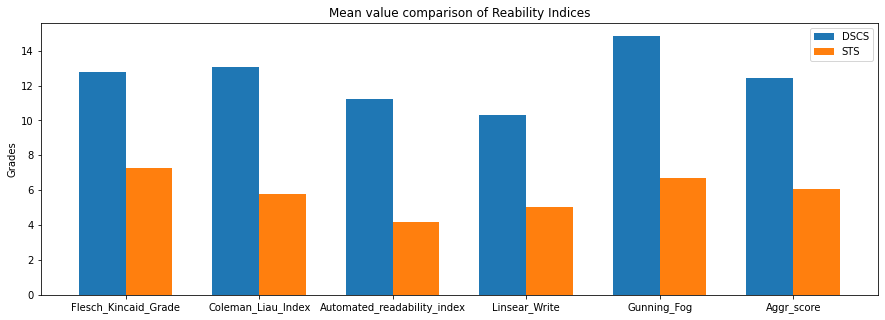

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, dscs_mean_list, width, label='DSCS')
rects2 = ax.bar(x + width/2, sts_mean_list, width, label='STS')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Grades')
ax.set_title('Mean value comparison of Reability Indices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [ ]:
# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(15,5))
# rects1 = ax.bar(x - width/2, dscs_std_list, width, label='DSCS')
# rects2 = ax.bar(x + width/2, sts_std_list, width, label='STS')


# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Grades')
# ax.set_title('Standard deviation comparison of Reability Indices')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

In [ ]:
sick_dataset = pd.read_csv('/content/drive/My Drive/SICK.csv')
sick_data_df = sick_dataset[['sentence_A','sentence_B']]

In [ ]:
sick_data_df.head()

,sentence_A,sentence_B
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...
3,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...
4,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...


In [ ]:
sick_sentence_a = sick_dataset['sentence_A'].tolist()
sick_sentence_b = sick_dataset['sentence_B'].tolist()
sick_total_sentences = sick_sentence_a + sick_sentence_b

In [ ]:
len(sick_total_sentences)

19680

In [ ]:
for i in range(len(sick_total_sentences)):
  sick_total_sentences[i] = re.sub('[^a-zA-Z]', ' ', sick_total_sentences[i])
sick_total_sentences[0]

'A group of kids is playing in a yard and an old man is standing in the background'

In [ ]:
unique_sick_sentences = list(set(sick_total_sentences))

In [ ]:
len(unique_sick_sentences)

6076

In [ ]:
value_list_sick = []
for s in unique_sick_sentences:
    tempList =[]
    tempList.append(s)
    tempList.append(ts.char_count(s))
    tempList.append(ts.flesch_kincaid_grade(s))
    tempList.append(ts.coleman_liau_index(s))
    tempList.append(ts.automated_readability_index(s))
    tempList.append(ts.linsear_write_formula(s))
    tempList.append(ts.gunning_fog(s))
    tempList.append(ts.text_standard(s,float_output=True))
    value_list_sick.append(tempList)

In [ ]:
metrics_df_sick = pd.DataFrame(value_list_sick,columns=column_headers)
metrics_df_sick.head()

,Sentence,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
0,The goal is being guarded by a hockey player i...,51,7.2,4.57,3.5,5.5,5.2,8.0
1,A person on a bike is not in the air near a bo...,43,3.2,-1.24,-0.5,6.5,6.0,0.0
2,A dark black dog and a light brown dog are pla...,53,2.9,4.11,3.4,6.0,5.6,6.0
3,Two people are looking at a statue made of gold,38,3.7,3.28,1.5,4.0,4.0,4.0
4,The woman is not handling a frog,26,2.5,1.57,-0.6,2.5,2.8,3.0


In [ ]:
metrics_sick_sample1 = metrics_df_sick.sample(n=52,random_state=5)

In [ ]:
metrics_sick_sample1.describe()

,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,39.000000,4.230769,3.947885,2.269231,4.403846,5.509038,4.384615
std,14.918077,2.453132,3.137410,2.951207,2.126026,2.546931,2.352753
min,19.000000,-1.500000,-2.460000,-3.600000,2.000000,2.400000,0.000000
25%,29.750000,2.500000,1.547500,0.300000,3.000000,3.200000,3.000000
50%,35.000000,3.850000,4.210000,2.300000,4.000000,4.800000,4.000000
75%,43.000000,6.000000,5.737500,3.600000,5.000000,8.040000,6.000000
max,87.000000,10.400000,15.910000,11.400000,12.000000,10.620000,10.000000


In [ ]:
sick_sample_describe1 = metrics_sick_sample1.describe()
sick_des_list1 = sick_sample_describe1.values.tolist()

In [ ]:
metrics_sick_sample1 = metrics_df_sick.sample(n=52,random_state=5)

In [ ]:
sick_mean_list1 = sick_des_list1[1][1:7]

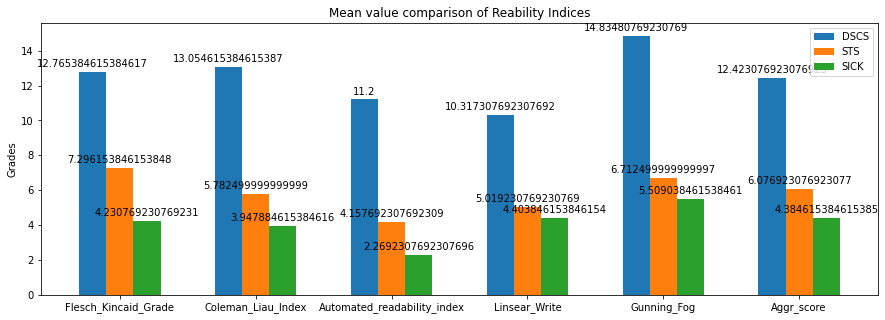

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig.dpi = 400
fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - 0.2, dscs_mean_list, width=0.2, label='DSCS')
rects2 = ax.bar(x , sts_mean_list1, width=0.2, label='STS')
rects3 = ax.bar(x + 0.2, sick_mean_list1, width=0.2, label='SICK' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Grades')
ax.set_title('Mean value comparison of Reability Indices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [ ]:
metrics_sts_sample2 = metrics_df_sts.sample(n=52,random_state=8)
sts_sample_describe2 = metrics_sts_sample2.describe()
sts_des_list2 = sts_sample_describe2.values.tolist()
sts_mean_list2 = sts_des_list2[1][1:7]

In [ ]:
metrics_sick_sample2 = metrics_df_sick.sample(n=52,random_state=8)
sick_sample_describe2 = metrics_sick_sample2.describe()
sick_des_list2 = sick_sample_describe2.values.tolist()
sick_mean_list2 = sick_des_list2[1][1:7]

In [ ]:
metrics_sts_sample3 = metrics_df_sts.sample(n=52,random_state=48)
sts_sample_describe3 = metrics_sts_sample3.describe()
sts_des_list3 = sts_sample_describe3.values.tolist()
sts_mean_list3 = sts_des_list3[1][1:7]
metrics_sick_sample3 = metrics_df_sick.sample(n=52,random_state=48)
sick_sample_describe3 = metrics_sick_sample3.describe()
sick_des_list3 = sick_sample_describe3.values.tolist()
sick_mean_list3 = sick_des_list3[1][1:7]

In [ ]:
dscs_mean_list

[12.765384615384617,
 13.054615384615387,
 11.2,
 10.317307692307692,
 14.83480769230769,
 12.423076923076923]

In [ ]:
sts_mean_list3

[6.853846153846153,
 5.455769230769229,
 4.013461538461539,
 5.115384615384615,
 7.193269230769231,
 6.0]

In [ ]:
sick_mean_list3

[3.9673076923076924,
 3.8444230769230763,
 2.2538461538461534,
 4.423076923076923,
 5.298653846153846,
 4.1923076923076925]

In [ ]:
column_headers

['Sentence',
 'No of characters',
 'Flesch_Kincaid_Grade',
 'Coleman_Liau_Index',
 'Automated_readability_index',
 'Linsear_Write',
 'Gunning_Fog',
 'Aggr_score']